## Consistent Profit from Bonus Bets?

In [1]:
import random as rn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn

Create Record List of Games

In [2]:
def record_creation(Num_games, Multiplier,Odds):
    recordList = [] #result list
    
    for i in range(Num_games):        
        num = rn.random() 
        if num <= Odds[0]:
            recordList.append('1')
        elif num >= (Odds[0]+Odds[1]): 
            recordList.append("2") 
        else:
            recordList.append("X")
    
    return recordList

Set Parameters

In [3]:
Bet = 5 # Bet amount # Standard 

Multiplier = np.array([3.0, 2.9, 2.5])
Odds_unnormalized=1/Multiplier
Odds = Odds_unnormalized/np.sum(Odds_unnormalized)
Num_games = 50
Initial_Budget = 100
num_simulations = 1000

# Probability Distribution Test
# test_rec=record_creation(1000, Multiplier, Odds)
# Distribution=np.asarray([test_rec.count('1'),test_rec.count('X'),test_rec.count('2')])/1000
# print('Expected:',np.round(Odds,2),'\nActual  :',Distribution)

## No Bonus

29.1% of bettors have postive resutls


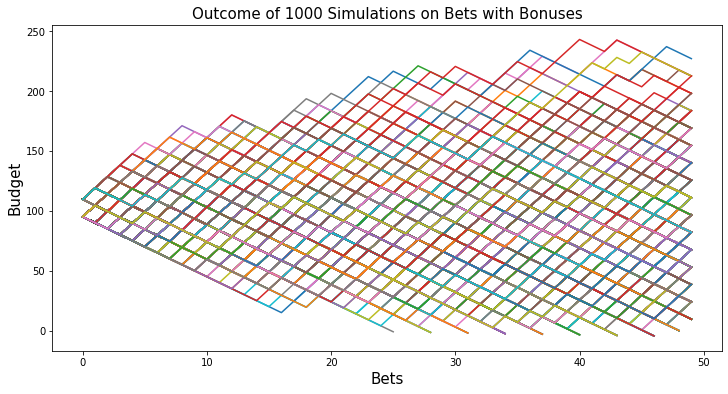

In [4]:
win_counter = 0
plt.figure(figsize=(12,6))

for n in range(num_simulations):
    Games_record = record_creation(Num_games, Multiplier, Odds)
    money = Initial_Budget
    output=[]
    
    for j in range(Num_games):
        if money <= 0:
            pass
        elif Games_record[j]=='X':
            money += Bet*Multiplier[1]-Bet# 2*Bet*Multiplier[1]-Bet # Formula because of bonus
            output.append(money)
        else:
            money -= Bet
            output.append(money)
    if output[-1]>float(Initial_Budget):
        win_counter+=1
    plt.plot(output)

win_percent = 100*win_counter/num_simulations
print("{}% of bettors have postive resutls".format(win_percent))
plt.title('Outcome of {} Simulations on Bets with Bonuses'.format(num_simulations), fontsize=15)
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.show()

## With Bonus

95.4% of bettors have postive resutls
Average budget after 10 bets: 128.184
Average budget after 20 bets: 153.837
Average budget after 50 bets: 162.0


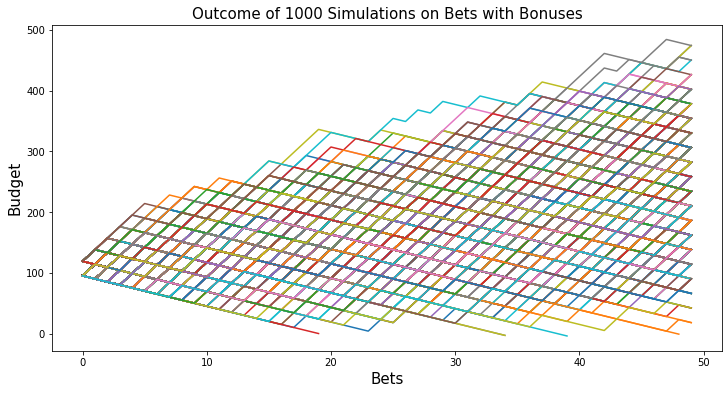

In [5]:
win_counter = 0
plt.figure(figsize=(12,6))
budget_at_ten=[]
budget_at_twenty=[]

for n in range(num_simulations):
    Games_record = record_creation(Num_games, Multiplier,Odds)
    money = Initial_Budget
    output=[]
    end_budget=[]

    for j in range(Num_games):
        if money <= 0:
            pass
        elif Games_record[j]=='X':
            money += 2*Bet*(Multiplier[1]-1) # Formula because of bonus
            output.append(money)
        else:
            money -= Bet
            output.append(money)
    
    end_budget.append(output[-1])
    # Budget at 10 and 20, stupidest way possible
    if len(output)<=10:
        budget_at_ten.append(0)
        budget_at_twenty.append(0)
    elif 10<len(output)<=20:
        budget_at_ten.append(output[10])
        budget_at_twenty.append(0)
    else:
        budget_at_ten.append(output[10])
        budget_at_twenty.append(output[20])
        
    if output[-1]>float(Initial_Budget):
        win_counter+=1
    plt.plot(output)

win_percent = 100*win_counter/num_simulations
print("{}% of bettors have postive resutls".format(win_percent))
print("Average budget after 10 bets: {}".format( np.mean(budget_at_ten)))
print("Average budget after 20 bets: {}".format( np.mean(budget_at_twenty)))
print("Average budget after 50 bets: {}".format( np.mean(end_budget)))
plt.title('Outcome of {} Simulations on Bets with Bonuses'.format(num_simulations), fontsize=15)
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.show()